# Topic Modeling #

Gensim-based functions:

Load functions from 'topics.py'.

In [1]:
import topics as tp

Tell jupyter to draw figures within the browser.

In [2]:
%matplotlib inline

Read text files from a folder.

In [3]:
#folder = './test_corpus/*.txt'
folder = './corpus_lang/*.txt'
documents = tp.readCorpus(folder)

Store the file names as document labels in a separate list.

In [4]:
doc_labels = tp.docLabels(folder)
doc_labels

['Kipling_TheEndofthePassage',
 'Howard_TheDevilinIron',
 'Poe_TheMasqueoftheRedDeath',
 'Doyle_AScandalinBohemia',
 'Doyle_AStudyinScarlet',
 'Kipling_ThyServantaDog',
 'Poe_TheCaskofAmontillado',
 'Howard_ShadowsintheMoonlight',
 'Howard_GodsoftheNorth',
 'Howard_SchadowsinZamboula',
 'Doyle_TheSignoftheFour',
 'Lovecraft_AttheMountainofMadness',
 'Poe_ThePurloinedLetter',
 'Lovecraft_TheShunnedHouse',
 'Poe_EurekaAProsePoem',
 'Kipling_TheJungleBook',
 'Doyle_TheHoundoftheBaskervilles']

### Preprocessing ###

Tokenize texts.

In [5]:
texts = tp.tokenize(documents)

Remove hapax legomena.

In [6]:
texts = tp.removeHapaxLeg(texts)

Remove stopwords.

In [7]:
texts = tp.removeStopWords(texts, stoplist = 'en')

### Model creation ###

In [8]:
from gensim import corpora, models

no_of_topics = 10

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
model = models.LdaModel(corpus,
    id2word = dictionary,
    num_topics = no_of_topics,
    passes = 10
    )

Show some topics.

In [9]:
model.show_topics(num_topics = 5)

['0.007*s + 0.005*lake + 0.005*great + 0.004*old + 0.003*ones + 0.003*city + 0.003*camp + 0.003*did + 0.003*feet + 0.003*like',
 '0.015*said + 0.011*s + 0.008*man + 0.005*holmes + 0.005*like + 0.004*sir + 0.004*t + 0.004*did + 0.004*came + 0.004*come',
 '0.001*s + 0.001*said + 0.001*man + 0.000*like + 0.000*came + 0.000*conan + 0.000*great + 0.000*did + 0.000*little + 0.000*come',
 '0.010*house + 0.008*s + 0.007*street + 0.006*uncle + 0.006*harris + 0.003*door + 0.003*shunned + 0.003*old + 0.003*thing + 0.003*cellar',
 '0.011*said + 0.007*amontillado + 0.007*ugh + 0.006*fortunato + 0.004*let + 0.004*replied + 0.003*friend + 0.003*yes + 0.003*bones + 0.003*luchesi']

Save genisim output.

In [10]:
import os
from gensim.corpora import MmCorpus, Dictionary

print("saving ...\n")

foldername = 'test'
topics = model.show_topics(num_topics = 5)
 
if not os.path.exists("out"): os.makedirs("out")
 
with open("out/"+foldername+"_doclabels.txt", "w") as f:
    for item in doc_labels: f.write(item+"\n")
 
with open("out/"+foldername+"_topics.txt", "w") as f:
    for item, i in zip(topics, enumerate(topics)):
        f.write("topic #"+str(i[0])+": "+item+"\n")
 
dictionary.save("out/"+foldername+".dict")
MmCorpus.serialize("out/"+foldername+".mm", corpus)
model.save("out/"+foldername+".lda")

saving ...



Create a doc-topic matrix from the gensim objects.

In [12]:
doc_topic = tp.gensim_to_dtm(model, corpus, no_of_topics)

In [13]:
# get plot labels

topic_labels = []
for i in range(no_of_topics):
    topic_terms = [x[1] for x in model.show_topic(i, topn=3)]
    topic_labels.append(" ".join(topic_terms))
topic_labels

['said s little',
 'said s man',
 'said s man',
 's lake great',
 'atoms say matter',
 'house s street',
 's said man',
 's said man',
 's said man',
 'said amontillado ugh']

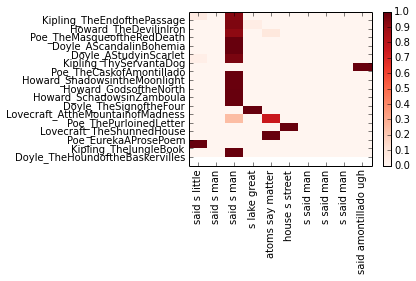

In [17]:
# cf. https://de.dariah.eu/tatom/topic_model_visualization.html
import matplotlib.pyplot as plt
import numpy as np

no_of_docs = len(corpus)

if no_of_docs > 20 or no_of_topics > 20: plt.figure(figsize=(20,20))    # if many items, enlarge figure
plt.pcolor(doc_topic, norm=None, cmap='Reds')
plt.yticks(np.arange(doc_topic.shape[0])+1.0, doc_labels)
plt.xticks(np.arange(doc_topic.shape[1])+0.5, topic_labels, rotation='90')
plt.gca().invert_yaxis()
plt.colorbar(cmap='Reds')
plt.tight_layout()

#plt.savefig(path+"/"+corpusname+"_heatmap.png") #, dpi=80)
plt.show()